Definition:

Linear Regression:Linear regression is a statistical method used to model the relationship between a dependent variable (y) and one independent variable (x).

It assumes a straight-line relationship between the independent variable and the dependent variable.                                                                  Multilinear (Multiple Linear) Regression:

Multiple linear regression is an extension of linear regression, where the relationship between the dependent variable (y) and multiple independent variables (x₁, x₂, x₃, ... xn) is modeled.

It assumes a linear relationship between the dependent variable and multiple independent variables.                                                        Number of Variables:

Linear Regression: Uses only one independent variable (predictor) to predict the dependent variable.

Multilinear Regression: Uses multiple independent variables (predictors) to predict the dependent variable.

Complexity:

Linear Regression: The model is simpler, as it involves only one independent variable.

Multilinear Regression: The model is more complex because it involves multiple independent variables. This makes it suitable for more complex relationships. Here our data has 7 features, X variable so it it multilinear regression. In linear regression, we have only one x variable.

In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('/content/gld_price_data.csv')

In [6]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [8]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [69]:
df.shape

(2290, 8)

In [10]:
df.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [12]:
# Check for duplicate rows
duplicates = df[df.duplicated()]

In [21]:
print(f"No of duplicate rows: {duplicates.shape[0]}")

No of duplicate rows: 0


In [22]:
df.drop_duplicates()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


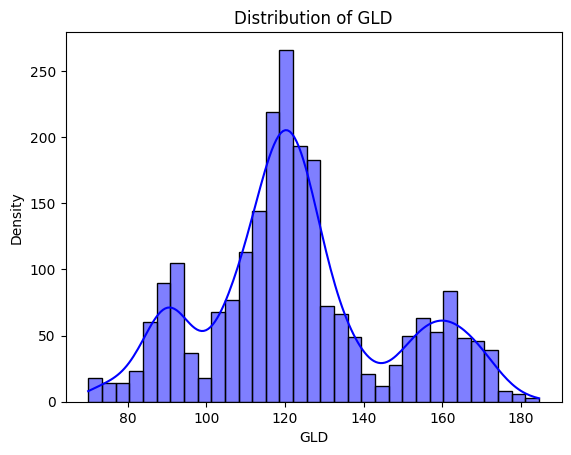

In [35]:
sns.histplot(df['GLD'], kde=True, color="blue")
plt.title('Distribution of GLD')
plt.xlabel('GLD')
plt.ylabel('Density')
plt.show()

In [ ]:
# Convert 'Date' column to datetime, then extract useful parts
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df = df.drop('Date', axis=1)  # Drop original Date column

In [37]:
# Step 3: Define features and target
X = df.drop('GLD', axis=1)
y = df['GLD']

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Step 4: Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Use of Multilinear REgression**

In [39]:
df.head()

,SPX,GLD,USO,SLV,EUR/USD,Year,Month,Day
0,1447.160034,84.860001,78.470001,15.180,1.471692,2008,1,2
1,1447.160034,85.570000,78.370003,15.285,1.474491,2008,1,3
2,1411.630005,85.129997,77.309998,15.167,1.475492,2008,1,4
3,1416.180054,84.769997,75.500000,15.053,1.468299,2008,1,7
4,1390.189941,86.779999,76.059998,15.590,1.557099,2008,1,8


In [40]:
# Step 5: Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [42]:
from sklearn.metrics import mean_squared_error, r2_score
# Step 6: Predict
y_pred = model.predict(X_test)

# Step 7: Evaluation
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R-squared (R²) Score:", r2_score(y_test, y_pred))

# Optional: Print coefficients
print("\nModel Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")

Mean Squared Error (MSE): 45.33531404842337
R-squared (R²) Score: 0.9173165736364424

Model Coefficients:
SPX: -0.0333
USO: 0.1517
SLV: 2.7089
EUR/USD: 10.5053
Year: 9.3697
Month: 0.6997
Day: 0.0200


In [46]:
from datetime import datetime

# Prompt the user to enter values
spx = float(input("Enter SPX value: "))
uso = float(input("Enter USO value: "))
slv = float(input("Enter SLV value: "))
eur_usd = float(input("Enter EUR/USD rate: "))

# Get current date for Day, Month, and Year (or use specific date if necessary)
current_date = datetime.now()
day = current_date.day
month = current_date.month
year = current_date.year

# Prepare the future data, including missing features (Day, Month, Year)
future_data = [[spx, uso, slv, eur_usd, day, month, year]]

# Predict future GLD price using the trained model
future_gld = model.predict(future_data)

# Display the prediction
print(f"\nPredicted GLD price for your input is: {future_gld[0]:.2f}")



Enter SPX value: 40
Enter USO value: 12
Enter SLV value: 23
Enter EUR/USD rate: 1.90

Predicted GLD price for your input is: -18519.83


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


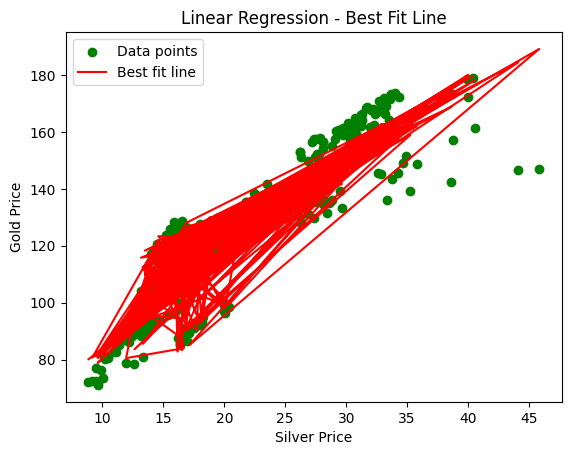

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot of the actual data points
plt.scatter(X_test['SLV'], y_test, label="Data points", color="green")

# Plot the best fit line (prediction) using the model's predictions
plt.plot(X_test['SLV'], y_pred, color='red', label="Best fit line")

# Labels and title
plt.xlabel("Silver Price")
plt.ylabel("Gold Price")
plt.title("Linear Regression - Best Fit Line")

# Display the plot
plt.legend()
plt.show()

**Using Decision Tree**

In [96]:
from sklearn.tree import DecisionTreeRegressor

In [71]:
regressor = DecisionTreeRegressor(random_state = 0)

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2)

In [98]:
# Initialize and train the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [99]:
# Predict on test data
y_pred_dt = dt_model.predict(X_test)

In [102]:
y_test = list(y_test)

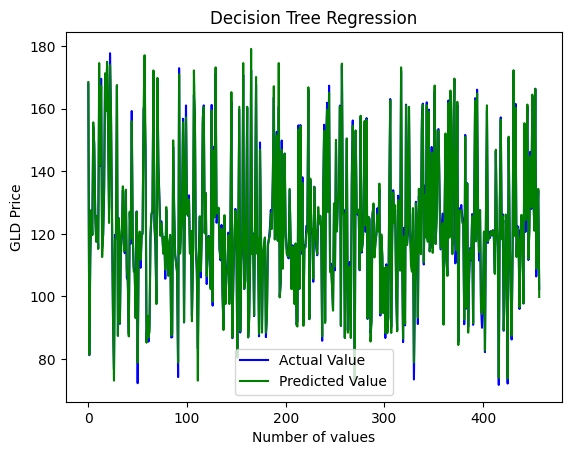

In [103]:
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(y_pred, color='green', label='Predicted Value')
plt.title('Decision Tree Regression')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [100]:
# Calculate MSE and R²
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Print the results
print("Decision Tree MSE:", mse_dt)
print("Decision Tree R²:", r2_dt)


Decision Tree MSE: 3.6755529567982785
Decision Tree R²: 0.9930313807028741


What is R² (R-squared)?
R² is called the coefficient of determination.
It tells us how well the independent variables (X) explain the variation in the dependent variable (y).
In linear regression, you build a model to predict y from X (e.g., predicting gold price from silver, oil, etc.).
R² gives you a numeric measure of how accurate your model is at this task.
R² = 1: Perfect fit. The model explains 100% of the variance in y.

R² = 0: The model does no better than just predicting the mean of y.

R² < 0: The model is doing worse than the mean — very poor prediction.

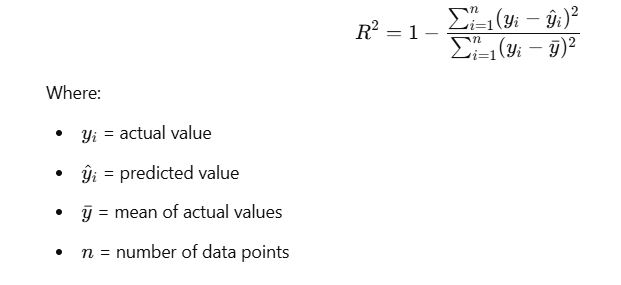

**RANDOM FOREST CLASSIFIER**

In [104]:
from sklearn.ensemble import RandomForestRegressor
# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

n_estimators=100
This means the random forest will build 100 separate decision trees.

The final prediction will be the average of predictions from all 100 trees (for regression).

More trees usually lead to better performance, but increase computation time.
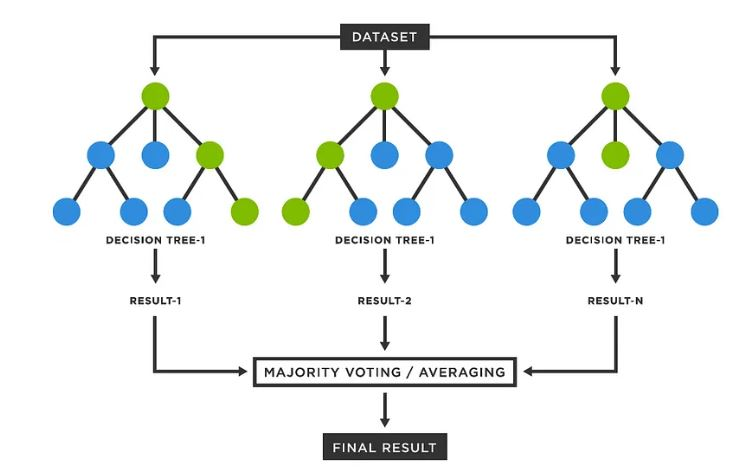

2. random_state=42
This is used to make the results reproducible.

It controls the random number generation.

In [105]:
# Calculate MSE and R²
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the results
print("Random Forest MSE:", mse_rf)
print("Random Forest R²:", r2_rf)

Random Forest MSE: 2.673641710964818
Random Forest R²: 0.9949309419726441
